In [1]:
import pandas as pd
import numpy as np
import pybaseball as pb
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Let's start with Logan Webb

In [2]:
webb = pb.statcast_pitcher('2023-03-30', '2023-10-01', 657277)

In [3]:
cond = (webb['on_1b'].notna() & webb['outs_when_up'].isin([0, 1]))
webb['dp_scenario'] = np.where(cond, 1, 0)

In [4]:
webb.groupby('dp_scenario')['pitch_type'].count()

dp_scenario
0    1840
1     345
Name: pitch_type, dtype: int64

In [5]:
webb = webb.join(pd.get_dummies(webb['pitch_type'], prefix='is'))

The changeup is Webb's signature groundball pitch

In [6]:
webb.groupby('pitch_type')['launch_angle'].mean().round()

pitch_type
CH    -9.0
FF    29.0
SI     7.0
SL    21.0
Name: launch_angle, dtype: float64

He leans on it more in double play scenarios

In [7]:
webb.groupby('dp_scenario')[['is_FF', 'is_SI', 'is_CH', 'is_SL']].mean().round(2)

,is_FF,is_SI,is_CH,is_SL
dp_scenario,,,,
0,0.03,0.37,0.37,0.22
1,0.03,0.37,0.45,0.15


He tends to get more ground balls in double play scenarios

In [8]:
webb.groupby('dp_scenario')['launch_angle'].mean().round()

dp_scenario
0    3.0
1   -2.0
Name: launch_angle, dtype: float64

In [9]:
webb = webb.join(pd.get_dummies(webb['events'], prefix='is'))

In [10]:
webb['is_GB'] = np.where(webb['launch_angle'] < 0, 1, 0)

In [11]:
P_GB = webb.dropna(subset=['launch_angle']).groupby('dp_scenario')['is_GB'].mean().round(2)

In [12]:
P_GB

dp_scenario
0    0.46
1    0.55
Name: is_GB, dtype: float64

In [13]:
webb['des'].str.contains('ground').mean()

0.35881006864988557

In [14]:
bbe = webb.dropna(subset=['launch_angle'])

In [15]:
df = pb.pitching_stats(2023, qual=100)

In [16]:
df.columns

Index(['IDfg', 'Season', 'Name', 'Team', 'Age', 'W', 'L', 'WAR', 'ERA', 'G',
       ...
       'LA', 'Barrels', 'Barrel%', 'maxEV', 'HardHit', 'HardHit%', 'Events',
       'CStr%', 'CSW%', 'xERA'],
      dtype='object', length=334)

In [17]:
df['GB%'].median()

0.435

Let's define a ground ball pitcher as any pitcher who has > 45% GB rate

In [18]:
df['gb_pitcher'] = np.where(df['GB%'] > 0.45, 1, 0)

In [19]:
df.groupby('gb_pitcher')['ERA', 'xERA'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_12808\2546960489.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gb_pitcher')['ERA', 'xERA'].mean().round(2)


,ERA,xERA
gb_pitcher,,
0,4.16,4.38
1,3.71,4.17


In [20]:
df.groupby('gb_pitcher')['ERA', 'xERA'].corr().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_12808\3131499089.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('gb_pitcher')['ERA', 'xERA'].corr().round(2)


ERA  xERA
gb_pitcher                 
0          ERA   1.00  0.60
           xERA  0.60  1.00
1          ERA   1.00  0.67
           xERA  0.67  1.00

In [21]:
pd.qcut(df['GB%'], 5)

30    (0.377, 0.411]
10     (0.411, 0.44]
26    (0.251, 0.377]
18    (0.377, 0.411]
6     (0.478, 0.606]
           ...      
40    (0.251, 0.377]
75    (0.251, 0.377]
73     (0.411, 0.44]
69    (0.377, 0.411]
58    (0.251, 0.377]
Name: GB%, Length: 77, dtype: category
Categories (5, interval[float64, right]): [(0.251, 0.377] < (0.377, 0.411] < (0.411, 0.44] < (0.44, 0.478] < (0.478, 0.606]]

In [22]:
df.groupby(pd.qcut(df['GB%'], 2))['ERA', 'xERA'].mean().round(2)

C:\Users\wampl\AppData\Local\Temp\ipykernel_12808\3225055052.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(pd.qcut(df['GB%'], 2))['ERA', 'xERA'].mean().round(2)


,ERA,xERA
GB%,,
"(0.251, 0.435]",4.28,4.40
"(0.435, 0.606]",3.73,4.22


Let's look at the exit velocity and launch angle of double plays in 2023

In [23]:

bbe_2015 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2016 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2017 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")
bbe_2018 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2019 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2020 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")
bbe_2021 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2021.csv")
bbe_2022 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2022.csv")
bbe_2023 = pd.read_csv("C:/Users/wampl/sxwOBA/statcast_data/bbe/bbe_2023.csv")

bbe = pd.concat([bbe_2015, bbe_2016, bbe_2017, bbe_2018, bbe_2019, bbe_2020, bbe_2021, bbe_2022, bbe_2023])

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

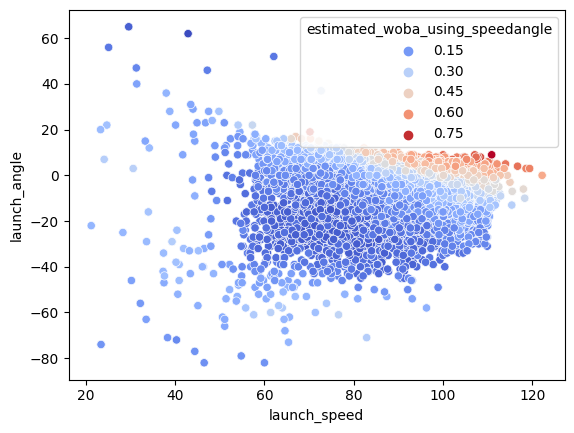

In [24]:
gidp = bbe.loc[bbe['events'] == 'grounded_into_double_play']
sns.scatterplot(data=gidp, x='launch_speed', y='launch_angle', hue='estimated_woba_using_speedangle', palette='coolwarm')

<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

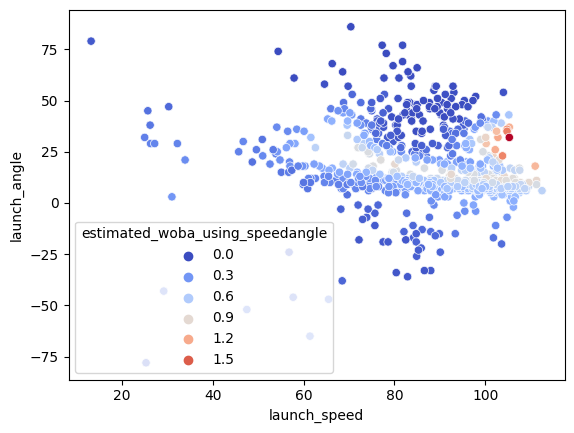

In [25]:
other_dp = bbe.loc[bbe['events'] == 'double_play']
sns.scatterplot(data=other_dp, x='launch_speed', y='launch_angle', hue='estimated_woba_using_speedangle', palette='coolwarm')

In [26]:
gidp[['launch_speed', 'launch_angle']].describe()

,launch_speed,launch_angle
count,20142.000000,20142.000000
mean,88.337161,-9.327525
std,13.621161,12.563923
min,21.200000,-82.000000
25%,79.300000,-17.000000
50%,90.700000,-8.000000
75%,99.000000,0.000000
max,122.200000,65.000000


In [27]:
gidp.loc[gidp['launch_angle'] > 10, ['launch_angle', 'launch_speed', 'description', 'des']].head()

,launch_angle,launch_speed,description,des
1017,15.0,58.5,hit_into_play,"Dodgers challenged (play at 1st), call on the ..."
2135,65.0,29.6,hit_into_play,Eduardo Rodriguez ground bunts into a double p...
3270,11.0,62.6,hit_into_play,"Harrison Bader grounds into a double play, sho..."
6051,13.0,72.0,hit_into_play,"Ben Gamel grounds into a double play, shortsto..."
7499,18.0,57.8,hit_into_play,"Manny Pina grounds into a double play, second ..."


In [28]:
bbe['is_gb'] = np.where(bbe['des'].str.contains('ground'), 1, 0)

<AxesSubplot: >

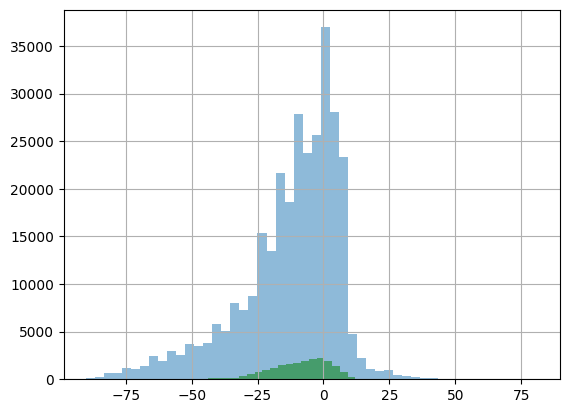

In [29]:
bbe.loc[bbe['is_gb']==1, 'launch_angle'].hist(bins=50, alpha=0.5)
bbe.loc[bbe['events']=='grounded_into_double_play', 'launch_angle'].hist(bins=50, alpha=0.5, color='green')

In [30]:
bbe['is_gidp'] = np.where(bbe['events'] == 'grounded_into_double_play', 1, 0)
bbe['is_gidp'] = pd.to_numeric(bbe['is_gidp'], errors='coerce')

In [31]:
pitch_gidp = bbe.loc[bbe['pitch_type'].isin(['FF', 'FT', 'SI', 'FC', 'SL', 'ST', 'CU', 'CH']), :].groupby('pitch_name')['is_gidp'].mean().round(3).sort_values(ascending=False)

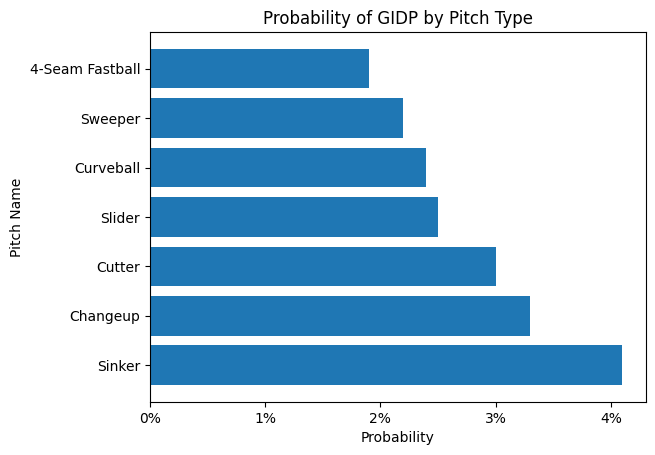

In [32]:
plt.barh(pitch_gidp.index, pitch_gidp.values)
plt.ylabel('Pitch Name')
plt.xlabel('Probability')
plt.title('Probability of GIDP by Pitch Type')
plt.xticks(np.arange(0, 0.05, 0.01), labels=['0%', '1%', '2%', '3%', '4%'])
plt.show()

In [33]:
pitch_gidp

pitch_name
Sinker             0.041
Changeup           0.033
Cutter             0.030
Slider             0.025
Curveball          0.024
Sweeper            0.022
4-Seam Fastball    0.019
Name: is_gidp, dtype: float64

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve, auc
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, min_child_weight=2, seed=123, tree_method='gpu_hist', gpu_id=0, verbosity=0, eval_metric='auc', learning_rate=0.1)
clf = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=2500)

In [35]:
X = bbe[['launch_speed', 'launch_angle']]
y = bbe['is_gidp']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [37]:
xgb_clf.fit(X_train, y_train)
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1] # Use the second column as the predicted probabilities for the positive class

In [38]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score:", roc_auc)

ROC AUC score: 0.8376053003528103


In [39]:
# high_k = KNeighborsClassifier(n_neighbors=2500, n_jobs=-1)
# high_k.fit(X_train, y_train)
# y_pred_proba_knn = high_k.predict_proba(X_test)

In [40]:
# y_pred_proba_knn = y_pred_proba_knn[:,1]
# roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

# print("ROC AUC score:", roc_auc)

In [41]:
fpr, tpr, thhrerholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

Text(0, 0.5, 'True Positive Rate')

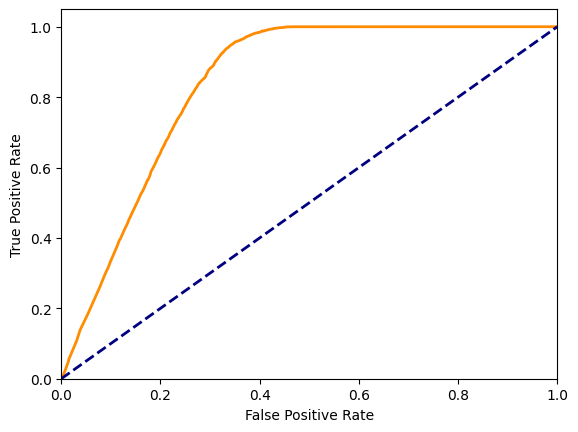

In [42]:
# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

(array([1.50733e+05, 3.51300e+03, 6.22700e+03, 2.66700e+03, 6.14600e+03,
        9.33000e+02, 1.48100e+03, 2.64000e+03, 1.10900e+03, 1.27100e+03,
        1.73200e+03, 1.39500e+03, 1.07200e+03, 8.15000e+02, 3.20400e+03,
        1.18700e+03, 8.86000e+02, 2.36700e+03, 2.90200e+03, 5.11000e+02,
        1.13100e+03, 1.81400e+03, 1.69000e+03, 2.06000e+03, 1.28300e+03,
        1.48700e+03, 1.80200e+03, 2.90500e+03, 1.25000e+03, 6.88000e+02,
        1.63500e+03, 3.10300e+03, 8.24000e+02, 2.19000e+03, 2.03700e+03,
        6.19300e+03, 2.55300e+03, 2.51500e+03, 3.42600e+03, 1.58200e+03,
        4.16600e+03, 4.70100e+03, 1.35530e+04, 2.63550e+04, 4.70700e+03,
        2.76200e+03, 9.09000e+02, 8.89000e+02, 0.00000e+00, 2.00000e+00]),
 array([3.22458873e-05, 1.95034209e-03, 3.86843830e-03, 5.78653486e-03,
        7.70463096e-03, 9.62272752e-03, 1.15408236e-02, 1.34589197e-02,
        1.53770158e-02, 1.72951128e-02, 1.92132089e-02, 2.11313050e-02,
        2.30494011e-02, 2.49674972e-02, 2.68855933e-

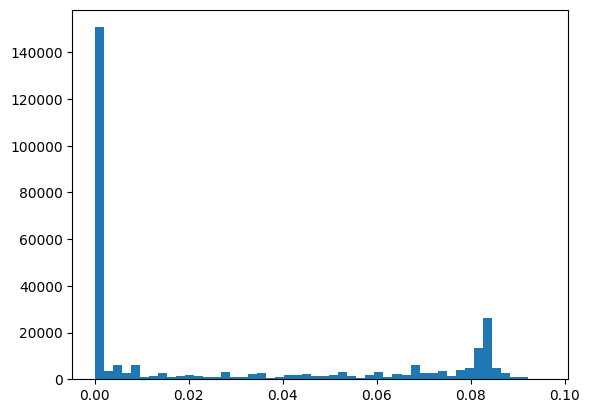

In [43]:
plt.hist(y_pred_proba, bins=50)

In [44]:
ev_space = np.linspace(0, 120, 40)
la_space = np.linspace(-60, 60, 40)
ev_grid, la_grid = np.meshgrid(ev_space, la_space)
X_grid = np.column_stack((ev_grid.ravel(), la_grid.ravel()))

In [45]:
pred_grid = xgb_clf.predict_proba(X_grid)[:,1]
y_proba_grid = pred_grid.reshape(ev_grid.shape)

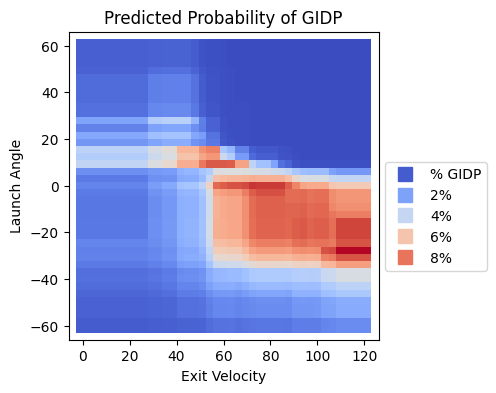

In [46]:

import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
sns.scatterplot(x=ev_grid.ravel(), y=la_grid.ravel(), marker='s', s=100, hue=pred_grid, edgecolor='none', palette='coolwarm', label="% GIDP", legend=True)
plt.xlabel('Exit Velocity')
plt.ylabel('Launch Angle')
plt.title("""Predicted Probability of GIDP""")

handles, labels = ax.get_legend_handles_labels()
new_handles = []
for handle, label in zip(handles, labels):
    color = handle.get_facecolor()[0]
    new_handle = plt.Line2D([], [], marker='s', markersize=10, linestyle='', color=color)
    new_handles.append(new_handle)

# Convert labels to percentages
labels = ["{:.0%}".format(float(label)) if label.replace('.','',1).isdigit() else label for label in labels]

plt.legend(new_handles, labels, bbox_to_anchor=(1, 0.6), loc='upper left')
plt.show()

In [47]:
features = bbe['launch_angle'].values.reshape(-1, 1)


In [48]:
bbe.groupby('events')['delta_run_exp'].mean().round(2)

events
double                       0.78
double_play                 -0.35
field_error                  0.43
field_out                   -0.24
fielders_choice              0.71
fielders_choice_out         -0.32
force_out                   -0.43
grounded_into_double_play   -0.50
home_run                     1.38
sac_bunt                    -0.08
sac_bunt_double_play        -0.11
sac_fly                     -0.29
sac_fly_double_play         -0.36
single                       0.48
triple                       1.06
triple_play                 -0.52
Name: delta_run_exp, dtype: float64

In [49]:
bbe.groupby('pitch_name')['delta_run_exp'].mean().round(2)

pitch_name
4-Seam Fastball    0.06
Changeup           0.05
Curveball          0.07
Cutter             0.05
Eephus             0.08
Forkball           0.15
Knuckle Curve      0.08
Knuckleball        0.26
Other              0.16
Screwball          0.20
Sinker             0.03
Slider             0.07
Slow Curve         0.19
Slurve             0.03
Split-Finger       0.05
Sweeper            0.07
Name: delta_run_exp, dtype: float64

In [50]:
bbe['runs_scored'] = bbe['post_bat_score'] - bbe['bat_score']

In [51]:
runs_scored = bbe.groupby(['game_date', 'home_team', 'away_team', 'inning', 'inning_topbot'], as_index=False)['runs_scored'].sum().rename(columns={'runs_scored': 'runs_scored_in_inning'})
runs_scored = runs_scored.reset_index()

In [52]:
runs_scored

,index,game_date,home_team,away_team,inning,inning_topbot,runs_scored_in_inning
0,0,2021-04-01,CHC,PIT,1,Bot,3
1,1,2021-04-01,CHC,PIT,1,Top,6
2,2,2021-04-01,CHC,PIT,2,Bot,0
3,3,2021-04-01,CHC,PIT,2,Top,3
4,4,2021-04-01,CHC,PIT,3,Bot,3
...,...,...,...,...,...,...,...
82559,82559,2023-08-03,TOR,BAL,7,Top,0
82560,82560,2023-08-03,TOR,BAL,8,Bot,0
82561,82561,2023-08-03,TOR,BAL,8,Top,3
82562,82562,2023-08-03,TOR,BAL,9,Bot,0


In [53]:
runs_scored.loc[:, ['game_date', 'home_team', 'away_team', 'inning', 'inning_topbot', 'runs_scored_in_inning']]

,game_date,home_team,away_team,inning,inning_topbot,runs_scored_in_inning
0,2021-04-01,CHC,PIT,1,Bot,3
1,2021-04-01,CHC,PIT,1,Top,6
2,2021-04-01,CHC,PIT,2,Bot,0
3,2021-04-01,CHC,PIT,2,Top,3
4,2021-04-01,CHC,PIT,3,Bot,3
...,...,...,...,...,...,...
82559,2023-08-03,TOR,BAL,7,Top,0
82560,2023-08-03,TOR,BAL,8,Bot,0
82561,2023-08-03,TOR,BAL,8,Top,3
82562,2023-08-03,TOR,BAL,9,Bot,0


In [54]:
df = pd.merge(bbe, runs_scored, on=['game_date', 'home_team', 'away_team', 'inning', 'inning_topbot'], how='left')

In [55]:
df['runs_scored_EOI'] = df['runs_scored_inning'] - (df['bat_score'] - df['bat_score_min'])

KeyError: 'runs_scored_inning'

: 

In [ ]:
df.sort_values('runs_scored_EOI', ascending=False).head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,sprint_speed,target,if_fielding_alignment,of_fielding_alignment,batter_team,pitcher_team,stand_L,stand_R,batter_name,hc_x_adj,hc_y_adj,field_x,field_y,theta,theta_deg,hit_direction,pull,oppo,pulled_barrel,rf_xwoba,sxwOBA,sxwoba_probs,sxwoba_prob_model,gidp_prob,is_gb,is_gidp,runs_scored,runner_1b,runner_2b,runner_3b,runners,bat_score_min,runs_scored_inning,runs_scored_EOI
676602,CH,2021-08-14,83.8,-2.17,5.24,"Williams, Devin",668804,642207,single,hit_into_play,NaN,NaN,NaN,NaN,13.0,Bryan Reynolds singles on a ground ball to cen...,R,L,R,PIT,MIL,X,8.0,ground_ball,1,2,2021,-1.43,-0.47,-0.43,1.25,NaN,NaN,NaN,1,6,Bot,140.98,103.96,NaN,NaN,553882,NaN,NaN,6.911162,-121.856058,-1.851563,-15.598438,25.397839,-36.624654,3.49,1.60,7.0,80.7,-10.0,84.3,2945.0,6.8,632897,642207,553882,607054,543939,649966,642715,592885,456715,541645,53.69,0.100,0.090,0.90,1.0,1.0,0.0,2.0,51,5,Changeup,0,5,0,5,5,0,0,5,285.0,0.008,0.312,28.7,3,1.0,1.0,PIT,MIL,1,0,bryan reynolds,14.98,100.54,163.369951,121.000112,0.637491,36.525534,center,0,0,0,0.154990,0.256808,[0. 0.64 0. 0. 0. 0.02 0.34],0.8820,0.085008,1,0,0,0,0,0,000,0,14,14
355630,CH,2021-08-14,83.8,-2.17,5.24,"Williams, Devin",668804,642207,single,hit_into_play,NaN,NaN,NaN,NaN,13.0,Bryan Reynolds singles on a ground ball to cen...,R,L,R,PIT,MIL,X,8.0,ground_ball,1,2,2021,-1.43,-0.47,-0.43,1.25,NaN,NaN,NaN,1,6,Bot,140.98,103.96,NaN,NaN,553882,NaN,NaN,6.911162,-121.856058,-1.851563,-15.598438,25.397839,-36.624654,3.49,1.60,7.0,80.7,-10.0,84.3,2945.0,6.8,632897,642207,553882,607054,543939,649966,642715,592885,456715,541645,53.69,0.100,0.090,0.90,1.0,1.0,0.0,2.0,51,5,Changeup,0,5,0,5,5,0,0,5,285.0,0.008,0.312,28.7,3,1.0,1.0,PIT,MIL,1,0,bryan reynolds,14.98,100.54,163.369951,121.000112,0.637491,36.525534,center,0,0,0,0.154990,0.256808,[0. 0.64 0. 0. 0. 0.02 0.34],0.8820,0.085008,1,0,0,0,0,0,000,0,14,14
355631,CH,2021-08-14,84.1,-2.19,5.18,"Williams, Devin",663647,642207,field_out,hit_into_play,NaN,NaN,NaN,NaN,14.0,"Ke'Bryan Hayes grounds out softly, pitcher Dev...",R,R,R,PIT,MIL,X,1.0,ground_ball,2,0,2021,-1.46,-0.30,0.84,1.25,NaN,NaN,NaN,0,6,Bot,133.63,189.08,NaN,NaN,553882,NaN,NaN,10.038120,-122.173839,-2.184286,-16.489544,21.293591,-35.044239,3.30,1.50,1.0,43.0,-63.0,85.6,2728.0,7.1,632897,642207,553882,607054,543939,649966,642715,592885,456715,541645,53.44,0.146,0.131,0.00,1.0,0.0,0.0,1.0,50,3,Changeup,0,5,0,5,5,0,0,5,277.0,-0.007,-0.350,27.8,9,1.0,1.0,PIT,MIL,0,1,ke'bryan hayes,7.63,15.42,32.597623,11.016724,0.325910,18.673245,right,0,1,0,0.219499,0.209508,[0.06 0.02 0. 0. 0. 0.01 0.91],0.8370,0.006621,1,0,0,0,0,0,000,0,14,14
34658,CH,2021-08-14,83.8,-2.17,5.24,"Williams, Devin",668804,642207,single,hit_into_play,NaN,NaN,NaN,NaN,13.0,Bryan Reynolds singles on a ground ball to cen...,R,L,R,PIT,MIL,X,8.0,ground_ball,1,2,2021,-1.43,-0.47,-0.43,1.25,NaN,NaN,NaN,1,6,Bot,140.98,103.96,NaN,NaN,553882,NaN,NaN,6.911162,-121.856058,-1.851563,-15.598438,25.397839,-36.624654,3.49,1.60,7.0,80.7,-10.0,84.3,2945.0,6.8,632897,642207,553882,607054

In [ ]:
bbe['runners'].value_counts()

KeyError: 'runners'

In [ ]:
bbe.loc[bbe['player_name']=='Cobb, Alex'].groupby('events')['delta_run_exp'].agg(['mean','std'])

,mean,std
events,,
double,0.796217,0.399553
double_play,-0.378500,0.243554
field_error,0.408500,0.266772
field_out,-0.231980,0.138809
fielders_choice,0.865500,0.221176
fielders_choice_out,-0.405250,0.295143
force_out,-0.437500,0.210927
grounded_into_double_play,-0.510714,0.170584
home_run,1.532500,0.604250


In [ ]:
X = bbe['launch_angle'].values.reshape(-1, 1)
y = bbe['is_gidp'].values.reshape(-1, 1)
clf.fit(X, y)
prob_gidp = clf.predict_proba(X)[:,1]

c:\Users\wampl\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot: xlabel='launch_speed', ylabel='launch_angle'>

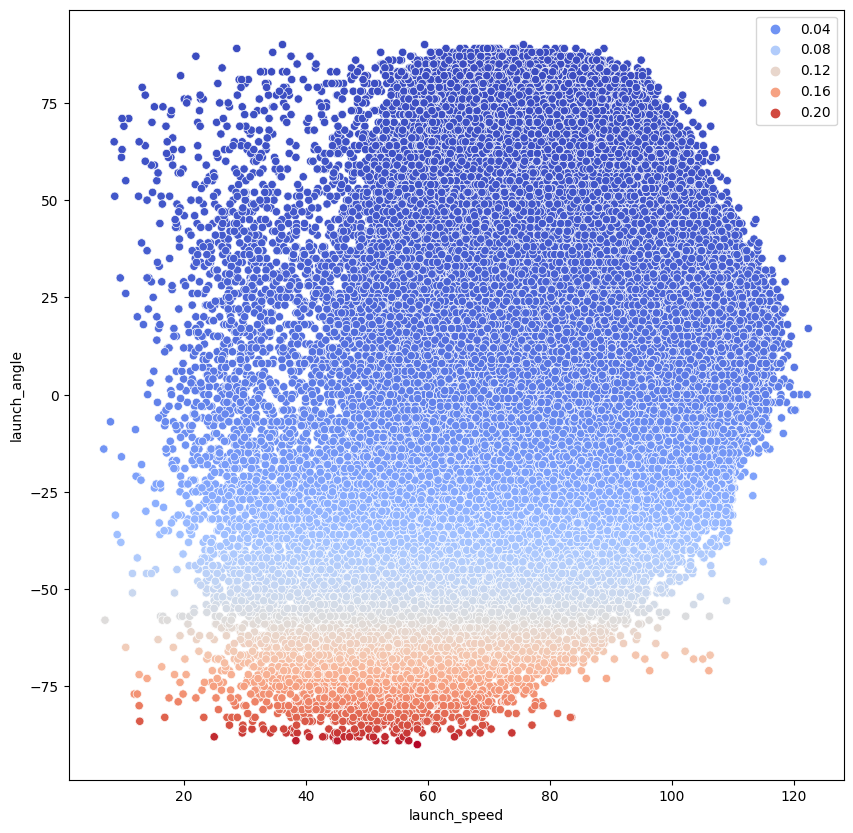

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=bbe, x='launch_speed', y='launch_angle', hue=prob_gidp, palette='coolwarm')

In [ ]:
bbe['gidp_prob'] = prob_gidp

In [ ]:
bbe.loc[bbe['game_year']==2023].groupby('player_name')['gidp_prob'].agg(['mean', 'count', 'sum']).sort_values('sum', ascending=False).head(10)

,mean,count,sum
player_name,,,
"Webb, Logan",0.033436,1227,41.026108
"Alcantara, Sandy",0.030490,1290,39.332135
"Stroman, Marcus",0.033036,1110,36.669945
"Gibson, Kyle",0.029862,1218,36.372366
"Corbin, Patrick",0.027980,1299,36.345669
"Cobb, Alex",0.035736,1014,36.235845
"Valdez, Framber",0.032279,1077,34.764260
"Mikolas, Miles",0.024758,1338,33.126680
"Keller, Mitch",0.028206,1170,33.000896


In [ ]:
gidps = bbe.loc[(bbe['events'] == 'grounded_into_double_play') & (bbe['description']=='hit_into_play')].groupby('player_name')['events'].count()

In [ ]:
gidps.sort_values(ascending=False).head(10)

player_name
Webb, Logan         123
Gibson, Kyle        108
Lyles, Jordan       105
Freeland, Kyle      105
Stroman, Marcus     105
Corbin, Patrick     102
Alcantara, Sandy    102
Dunning, Dane        93
Valdez, Framber      93
Greinke, Zack        90
Name: events, dtype: int64

: 

In [ ]:
import joblib

In [ ]:
# joblib.dump(high_k, 'C:/Users/wampl/sxwOBA/models/gidp_prob_model.joblib')
joblib.dump(clf, 'C:/Users/wampl/sxwOBA/models/gidp_logistic_model.joblib')
joblib.dump(xgb_clf, 'C:/Users/wampl/sxwOBA/models/gidp_xgb_model.joblib')

['C:/Users/wampl/sxwOBA/models/gidp_xgb_model.joblib']

In [ ]:
df = pd.read_csv('C:/Users/wampl/sxwOBA/statcast_data/current.csv')

In [ ]:
df.groupby('events')['woba_value'].mean().round(2)

events
catcher_interf                  0.70
caught_stealing_2b              0.00
caught_stealing_3b              0.00
caught_stealing_home            0.00
double                          1.25
double_play                     0.00
field_error                     0.90
field_out                       0.00
fielders_choice                 0.90
fielders_choice_out             0.00
force_out                       0.00
grounded_into_double_play       0.00
hit_by_pitch                    0.70
home_run                        2.00
other_out                       0.00
pickoff_1b                      0.00
pickoff_3b                      0.00
pickoff_caught_stealing_2b      0.00
pickoff_caught_stealing_home    0.00
sac_bunt                        0.30
sac_fly                         0.00
sac_fly_double_play             0.00
single                          0.90
stolen_base_2b                  0.00
strikeout                       0.00
strikeout_double_play           0.00
triple                         

In [ ]:
df.loc[:, ['sxwOBA', 'sxwOBA_adj', 'gidp_adj']].head()

KeyError: "['sxwOBA_adj', 'gidp_adj'] not in index"